# Titanic: Machine Learning from Disaster

This notebook will perform various process of exploratory data analysis on the data set of the Titanic data set from a competition from Kaggle. You can get the data set [here](https://www.kaggle.com/c/titanic/data). For more details about the data set, vist [here](https://www.kaggle.com/c/titanic)



In [1]:
#import dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Explore the data set

In [2]:
# import data set
df_train = pd.read_csv('train.csv')

In [3]:
# show the first few instances of the data set
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.shape

(891, 12)

This means that the data set has 891 instances and 12 attributes. These attributes has been describe clearly in the link of the data set. The code below shows more information about each attribute.

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


According to the above information, every attributes except the age and the cabin number of passengers does not contain missing values. The code below shows how many missing value in the age and the cabin columns

In [6]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Cleaning data

First, notice that there are some attributes that does not affect the percentage of survival of passengers. These attributes are:
* PassengerId
* Name
* Ticket
* Fare
* Cabin
* Embarked

As a result, these columns must be dropped. 

In [7]:
df_train.drop(["PassengerId","Name","Ticket","Fare","Cabin","Embarked"],axis=1,inplace=True)
df_train.dropna(inplace=True)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


# Statistical features

First, we need to understand the distribution of the data. 

In [8]:
df_train.describe(include="all")

,Survived,Pclass,Sex,Age,SibSp,Parch
count,714.000000,714.000000,714,714.000000,714.000000,714.000000
unique,NaN,NaN,2,NaN,NaN,NaN
top,NaN,NaN,male,NaN,NaN,NaN
freq,NaN,NaN,453,NaN,NaN,NaN
mean,0.406162,2.236695,NaN,29.699118,0.512605,0.431373
std,0.491460,0.838250,NaN,14.526497,0.929783,0.853289
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000
25%,0.000000,1.000000,NaN,20.125000,0.000000,0.000000
50%,0.000000,2.000000,NaN,28.000000,0.000000,0.000000
75%,1.000000,3.000000,NaN,38.000000,1.000000,1.000000


As can be seen from the table above, most of the passengers in the Titanic ship are man. Each passenger has at most 5 siblings and 6 parents, which means that there were only small-sized family in the ship. Also, the average age of the passengers in the ship is about 30 years old and passengers with age 80 were considered oldest passengers on the ship. 

In [9]:
df_train.groupby("Sex").sum()

,Survived,Pclass,Age,SibSp,Parch
Sex,,,,,
female,197,539,7286.00,167,185
male,93,1058,13919.17,199,123


As can be seen from this data, most people who survived from the accident are female. 

In [10]:
df_train.groupby("Pclass").sum()

,Survived,Age,SibSp,Parch
Pclass,,,,
1,122,7111.42,84,76
2,83,5168.83,74,70
3,85,8924.92,208,162


This reveals another important fact: most people who survived from the accident belongs to upper class. The two codes below shows that passengers with no siblings and parents will be more likely to survive than those with some siblings and parents.

In [11]:
df_train.groupby("SibSp").sum()

,Survived,Pclass,Age,Parch
SibSp,,,,
0,175,1078,14788.25,106
1,97,364,5506.42,130
2,11,57,565.50,18
3,4,29,167.00,17
4,3,54,127.00,27
5,0,15,51.00,10


In [12]:
df_train.groupby("Parch").sum()

,Survived,Pclass,Age,SibSp
Parch,,,,
0,186,1172,16765.00,134
1,61,238,2686.42,113
2,39,146,1170.75,107
3,3,13,166.00,5
4,0,10,178.00,3
5,1,15,196.00,3
6,0,3,43.00,1


The table below shows the strength of the relationship between variables

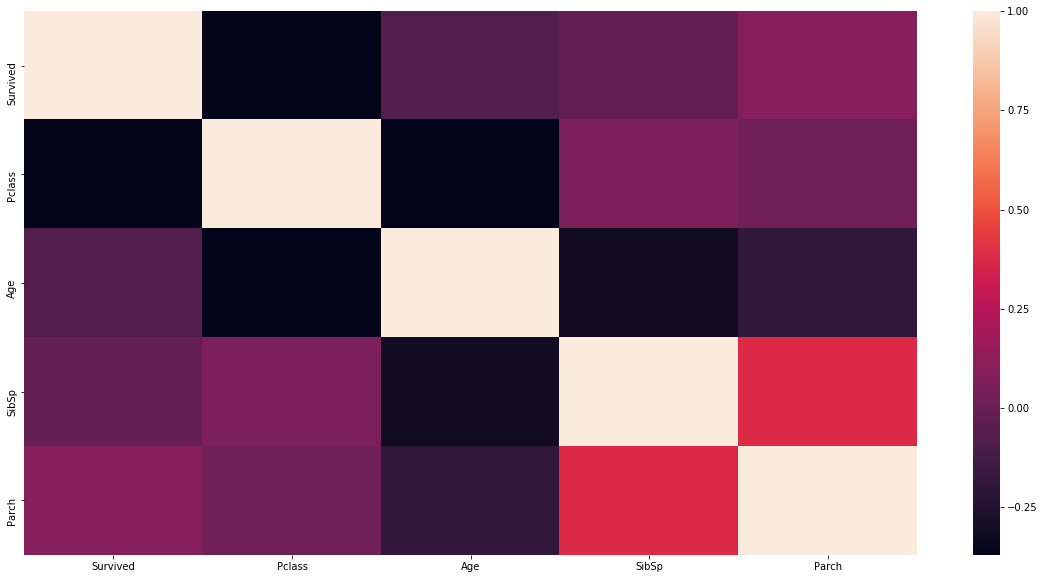

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(df_train.corr())

With the correlation table above, it is clear that the percentage of survival has a strong negative relationship with the class the passenger belongs to, and has a relatively weak relationship with the age of passengers, and the number of siblings and parents that the passenger has. 

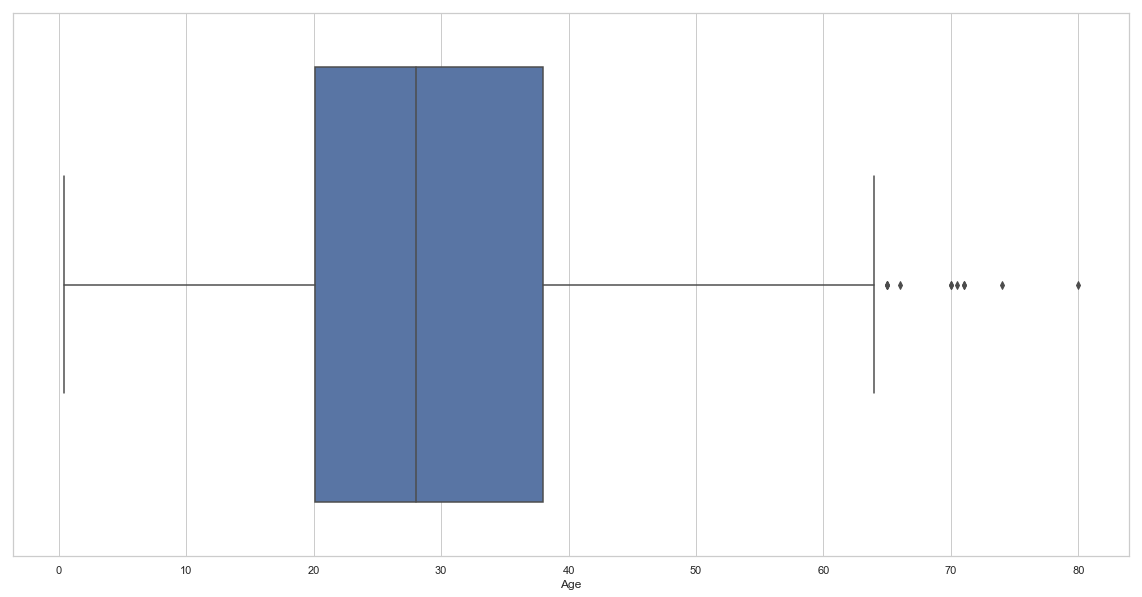

In [14]:
plt.figure(figsize=(20,10))
sns.set(style="whitegrid")
sns.boxplot(df_train["Age"])

The figure above shows that most of the passenger on the Titanic ships is about 20-38 years old. If we add another dimension, such as survival, we have

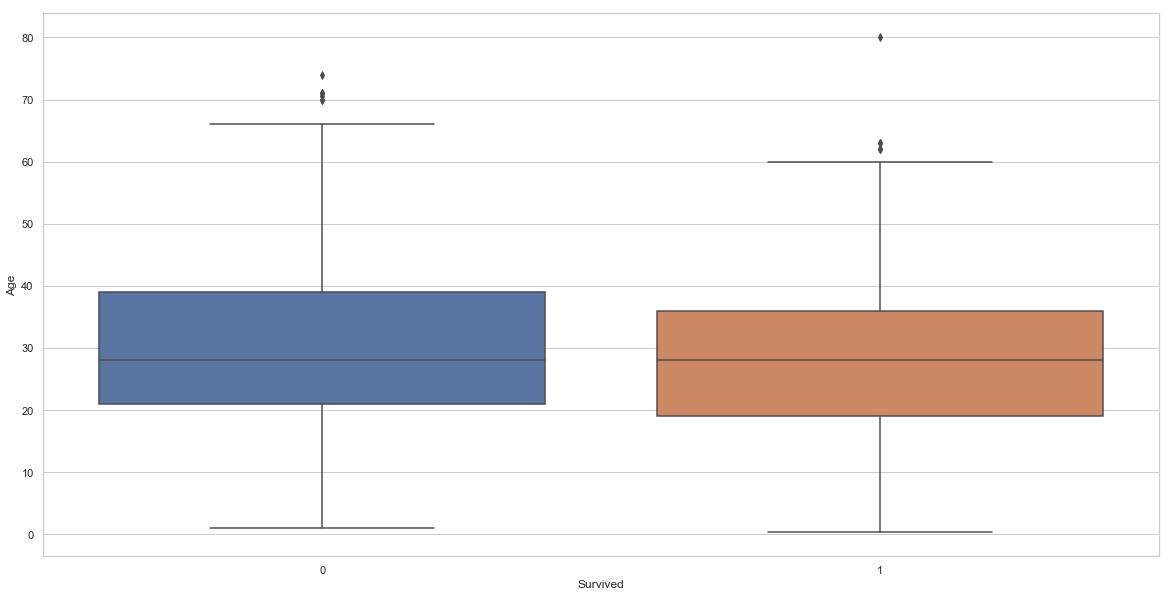

In [15]:
plt.figure(figsize=(20,10))
sns.boxplot(x="Survived",y="Age",data=df_train)

This means that the age does not have a strong effect on the risk of death because as can be seen, there is no significant difference in the difference between the median and the interquartile range of the two boxplots

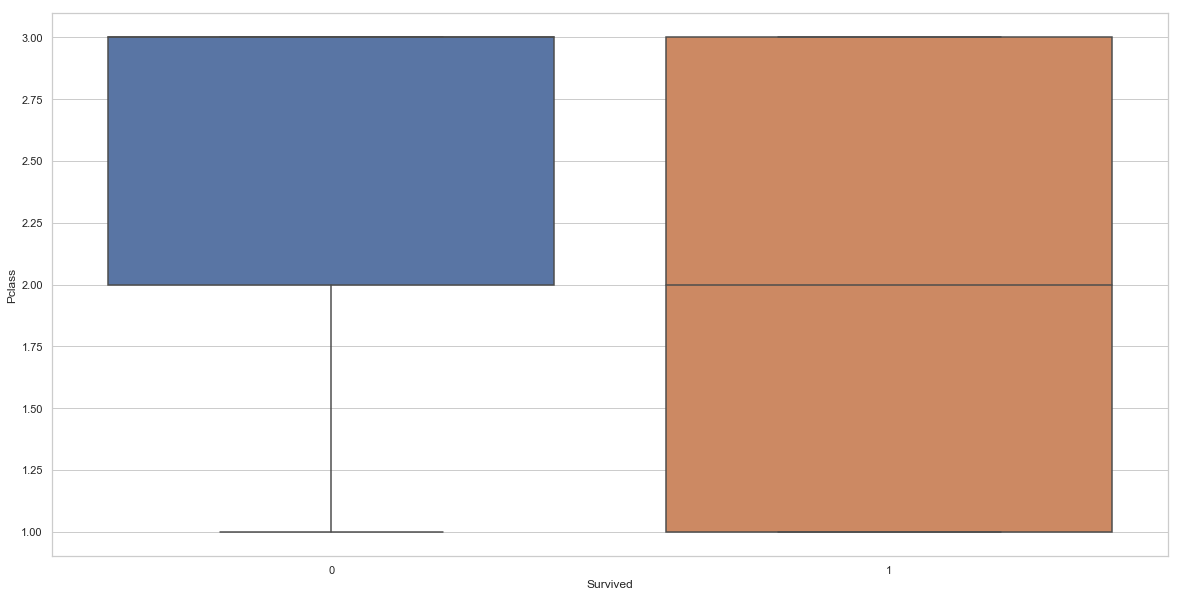

In [16]:
plt.figure(figsize=(20,10))
sns.boxplot(x="Survived",y="Pclass",data=df_train)

If we change the y-axis to Pclass, we can see that most people who did not survive belonged to the middle and lower class. This is proven by the strong negative relationship between the class and the risk of death; in other words, the higher class a passenger belongs to, the lower the risk of death that he or she has.

# Probability distribution

In this section, we will study the distribution of some numerical attributes. Let's start with age.

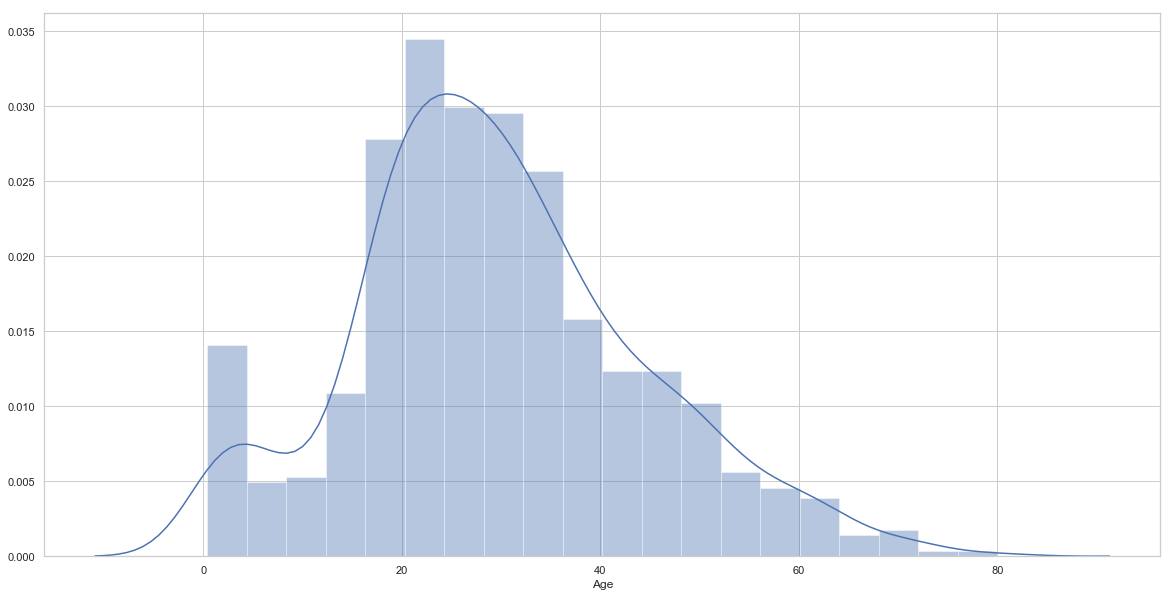

In [17]:
plt.figure(figsize=(20,10))
sns.distplot(df_train["Age"])

As can be seen from the figure, the distribution of age is approximately normal

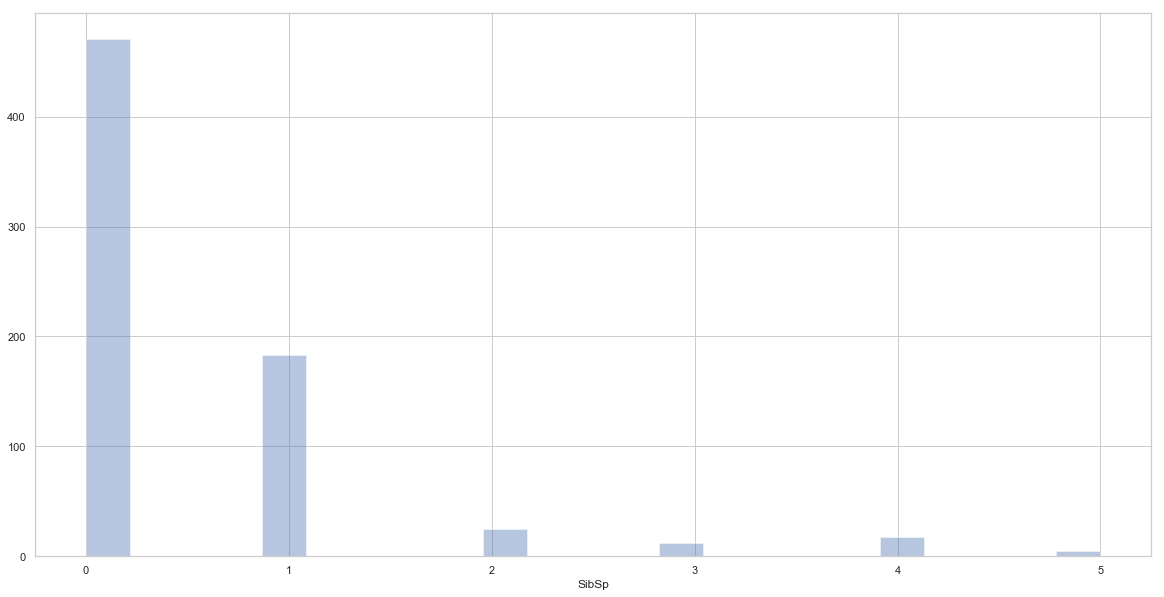

In [18]:
plt.figure(figsize=(20,10))
sns.distplot(df_train["SibSp"],kde=False)

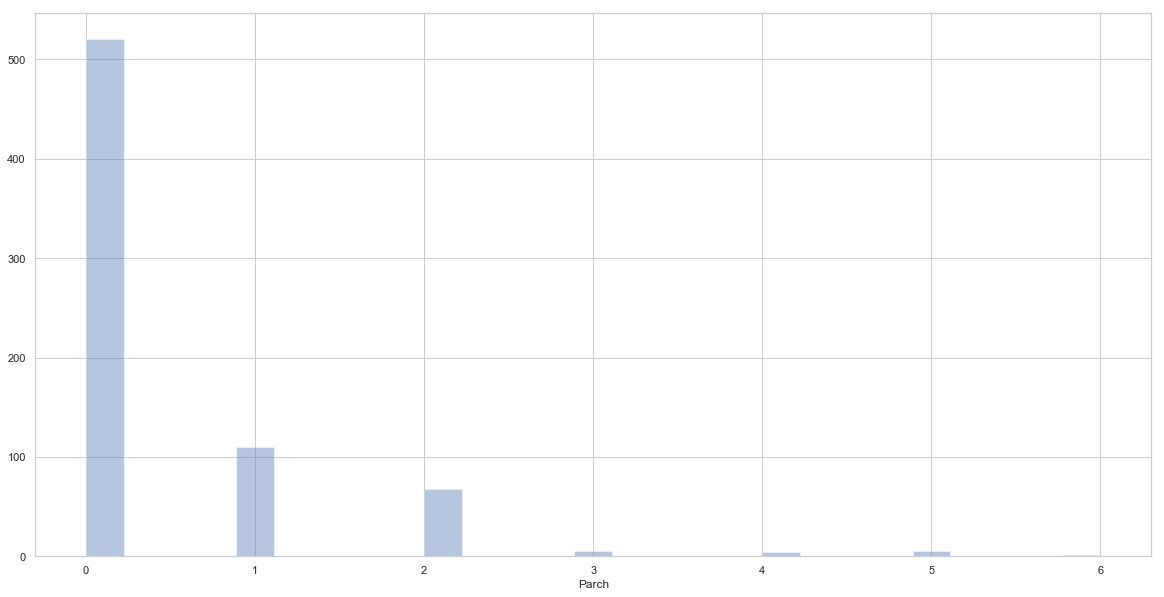

In [19]:
plt.figure(figsize=(20,10))
sns.distplot(df_train["Parch"],kde=False)

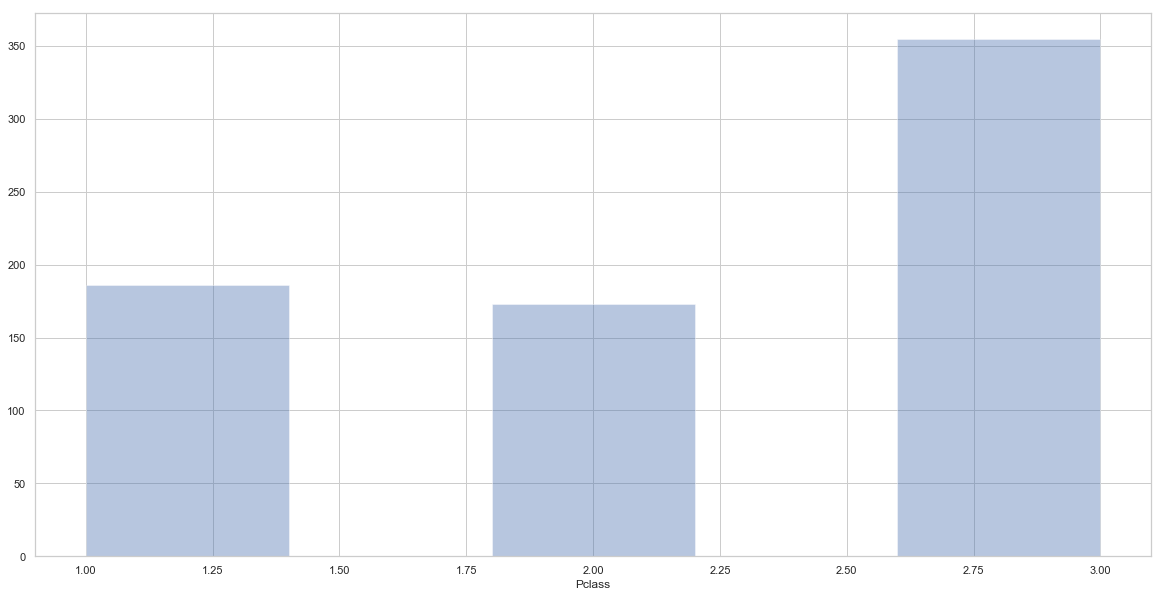

In [20]:
plt.figure(figsize=(20,10))
sns.distplot(df_train["Pclass"],kde=False)

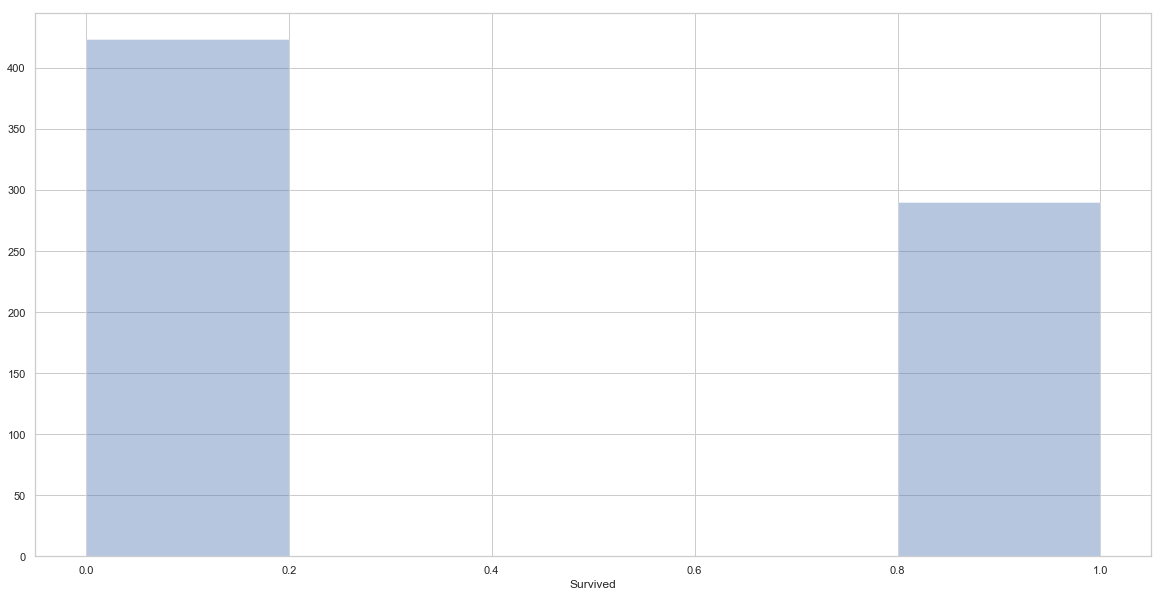

In [21]:
plt.figure(figsize=(20,10))
sns.distplot(df_train["Survived"],kde=False)

# Machine Learning

In [22]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [23]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 6 columns):
Survived    714 non-null int64
Pclass      714 non-null int64
Sex         714 non-null object
Age         714 non-null float64
SibSp       714 non-null int64
Parch       714 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 59.0+ KB


In [24]:
dummies_variable = pd.get_dummies(df_train["Sex"])
df_train = pd.concat([df_train,dummies_variable],axis=1)
df_train.drop(["Sex"],axis=1,inplace=True)
df_train.head()

,Survived,Pclass,Age,SibSp,Parch,female,male
0,0,3,22.0,1,0,0,1
1,1,1,38.0,1,0,1,0
2,1,3,26.0,0,0,1,0
3,1,1,35.0,1,0,1,0
4,0,3,35.0,0,0,0,1


In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [26]:
X = np.array(df_train[["Pclass","Age","SibSp","female","male"]])
X

array([[ 3., 22.,  1.,  0.,  1.],
       [ 1., 38.,  1.,  1.,  0.],
       [ 3., 26.,  0.,  1.,  0.],
       ...,
       [ 1., 19.,  0.,  1.,  0.],
       [ 1., 26.,  0.,  0.,  1.],
       [ 3., 32.,  0.,  0.,  1.]])

In [28]:
y = np.array(df_train["Survived"])
y

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,

In [29]:
model.fit(X,y)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [31]:
model.predict(np.array(df_train[["Pclass","Age","SibSp","female","male"]])[0].reshape(1,-1))

array([0])

In [32]:
from sklearn.metrics import accuracy_score
ypred = model.predict(X)
accuracy_score(ypred,y)

0.7927170868347339